# ML lab 03 - Linear Regression 의 cost 최소화
---

#### Simplified hypothesis
$$H(x) = Wx $$
$$cost(W)=\frac{1}{m} \sum_{i=1}^m ( H( x^{(i)} ) - y^{(i)} )^2$$


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


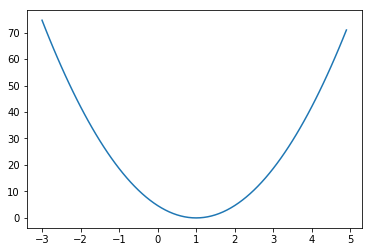

In [1]:
# cost 함수의 시각화 - Gradient descent algorithm 적용가능한가?

import tensorflow as tf
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

#### Gradient descent

$$cost(W)=\frac{1}{m} \sum_{i=1}^m ( W( x^{(i)} ) - y^{(i)} )^2$$

$$W := W - \alpha\frac{1}{m} \sum_{i=1}^m ( Wx^{(i)} - y^{(i)} )x^{(i)}$$


```
# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)
```

```
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
```

In [5]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
    


0 0.88698 [ 0.56403315]
1 0.252296 [ 0.76748437]
2 0.0717643 [ 0.87599164]
3 0.020413 [ 0.93386221]
4 0.00580635 [ 0.96472651]
5 0.00165158 [ 0.98118746]
6 0.000469786 [ 0.98996663]
7 0.000133629 [ 0.99464887]
8 3.801e-05 [ 0.99714607]
9 1.08112e-05 [ 0.99847794]
10 3.07499e-06 [ 0.99918824]
11 8.7482e-07 [ 0.99956703]
12 2.48876e-07 [ 0.99976909]
13 7.07958e-08 [ 0.99987686]
14 2.01183e-08 [ 0.99993432]
15 5.7322e-09 [ 0.99996495]
16 1.63912e-09 [ 0.99998128]
17 4.61196e-10 [ 0.99999005]
18 1.31958e-10 [ 0.9999947]
19 3.6291e-11 [ 0.9999972]
20 1.05409e-11 [ 0.99999851]


In [8]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    _, c, w = sess.run([train, cost, W], feed_dict={X: x_data, Y: y_data})
    print(step, c, w)
    



0 2.21514 [ 0.31103426]
1 1.82095 [ 0.37533772]
2 1.4969 [ 0.43363953]
3 1.23052 [ 0.48649985]
4 1.01154 [ 0.53442651]
5 0.831531 [ 0.57788002]
6 0.683556 [ 0.61727786]
7 0.561913 [ 0.65299857]
8 0.461918 [ 0.68538535]
9 0.379717 [ 0.7147494]
10 0.312144 [ 0.74137276]
11 0.256596 [ 0.76551133]
12 0.210934 [ 0.78739697]
13 0.173397 [ 0.80723989]
14 0.14254 [ 0.82523084]
15 0.117174 [ 0.8415426]
16 0.0963224 [ 0.85633194]
17 0.0791813 [ 0.86974096]
18 0.0650905 [ 0.88189846]
19 0.0535073 [ 0.89292127]
20 0.0439854 [ 0.9029153]


#### Optional : compute_gradient and apply_gradient
gradient에 추가적인 약을 치고 싶을 때 사용


In [9]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost)

### Additional compute gradients

# apply gradients
apply_gradients = optimizer.apply_gradients(gvs)


train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    _, c, w = sess.run([train, cost, W], feed_dict={X: x_data, Y: y_data})
    print(step, c, w)
    

0 4.47548 [ 0.02069848]
1 3.67904 [ 0.11209996]
2 3.02434 [ 0.19497064]
3 2.48614 [ 0.2701067]
4 2.04372 [ 0.33823007]
5 1.68003 [ 0.39999527]
6 1.38106 [ 0.45599571]
7 1.13529 [ 0.50676942]
8 0.933259 [ 0.55280429]
9 0.76718 [ 0.59454256]
10 0.630656 [ 0.63238525]
11 0.518427 [ 0.66669595]
12 0.42617 [ 0.69780433]
13 0.350331 [ 0.72600925]
14 0.287988 [ 0.75158173]
15 0.236739 [ 0.77476746]
16 0.19461 [ 0.79578918]
17 0.159978 [ 0.81484884]
18 0.131509 [ 0.8321296]
19 0.108106 [ 0.84779751]
20 0.088868 [ 0.86200309]
21 0.0730534 [ 0.87488282]
22 0.0600532 [ 0.88656044]
23 0.0493664 [ 0.89714813]
24 0.0405813 [ 0.90674764]
25 0.0333597 [ 0.91545117]
26 0.0274231 [ 0.92334241]
27 0.0225431 [ 0.93049711]
28 0.0185314 [ 0.93698406]
29 0.0152336 [ 0.94286555]
30 0.0125227 [ 0.94819808]
31 0.0102942 [ 0.95303291]
32 0.00846231 [ 0.95741653]
33 0.0069564 [ 0.96139097]
34 0.00571846 [ 0.96499449]
35 0.00470084 [ 0.96826166]
36 0.0038643 [ 0.97122389]
37 0.00317662 [ 0.97390968]
38 0.00261133 